In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
train = pd.read_csv("train.csv")


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [120]:
train_set = train.drop(["Name", "Ticket", "Cabin", "Survived"], axis = 1)
y_label = train['Survived']
train_set.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [ ]:
train_set["Embarked"]

In [6]:
train['Age'].isnull().sum()

177

In [118]:
copied = train_set.copy()
y_label.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [98]:
numerical = copied.select_dtypes(include='number')
numerical.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


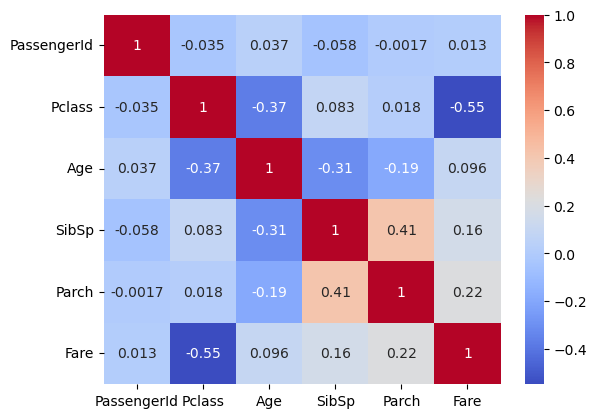

In [90]:
matrix = numerical.corr()
sns.heatmap(matrix, annot = True, cmap = 'coolwarm' )
plt.show()


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

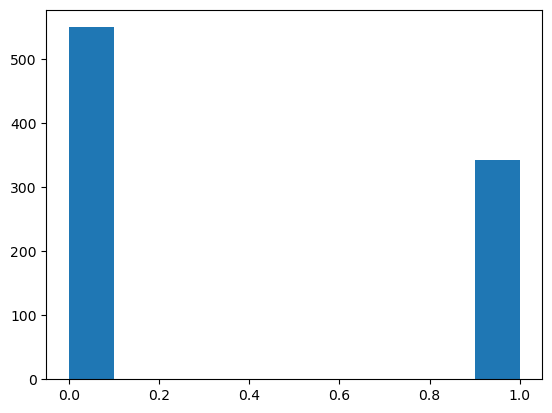

In [46]:
plt.hist(numerical['Survived'])

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [102]:
num_pipeline = Pipeline([
    ("Imputer", SimpleImputer(strategy="median")),
    ("Scaler", StandardScaler())
])


In [166]:
cat_pipeline = Pipeline([
    ("cat_imputer", SimpleImputer(strategy = 'most_frequent')),
    ("Encoder", OneHotEncoder(handle_unknown = "ignore"))
])



In [168]:
num_attr = list(numerical)
cat_attr = ["Sex", "Embarked"]
num_attr

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [170]:
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attr),
    ("cat", cat_pipeline, cat_attr)
])


In [172]:
X_train = full_pipeline.fit_transform(train_set)

In [174]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_label)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [194]:
from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier(
    max_depth=3,             # limit tree depth
    min_samples_split=5,     # min samples to split
    min_samples_leaf=2,      # min samples per leaf
    random_state=42)
dclf.fit(X_train, y_label)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [196]:
d_pre = dclf.predict(X_train)

In [184]:
pre = lr.predict(X_train)

In [198]:
accuracy_score(y_label, d_pre)

0.8271604938271605

In [186]:
from sklearn.metrics import accuracy_score
accuracy_score(y_label, pre)

0.8013468013468014

In [176]:
test = pd.read_csv("test.csv")
test.drop(["Name", "Ticket", "Cabin"], axis =1, inplace=True)

In [178]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [154]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [156]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [180]:
X_test = full_pipeline.fit_transform(test)

In [162]:
test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [164]:
train_set['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [182]:
predict = lr.predict(X_test)

In [206]:
submission = pd.DataFrame({
    "Passengerid" : test["PassengerId"],
    "Survived" : predict
})

In [225]:
submission
submission.to_csv("gender_submission.csv", index=False)

In [210]:
score = pd.read_csv("gender_submission.csv")

In [212]:
first = score['Survived']

In [227]:
sc = accuracy_score(first, predict)
sc

0.9401913875598086

In [219]:
d_predict = dclf.predict(X_test)

In [221]:
d_sc = accuracy_score(first,d_predict)

In [223]:
d_sc

0.9688995215311005

In [229]:
d_submission = pd.DataFrame({
    "Passengerid" : test["PassengerId"],
    "Survived" : d_predict
})

In [231]:
submission.to_csv("gender_submission.csv", index=False)